In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [10]:
df = pd.read_csv('data/samples.csv', index_col= 0, parse_dates= True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


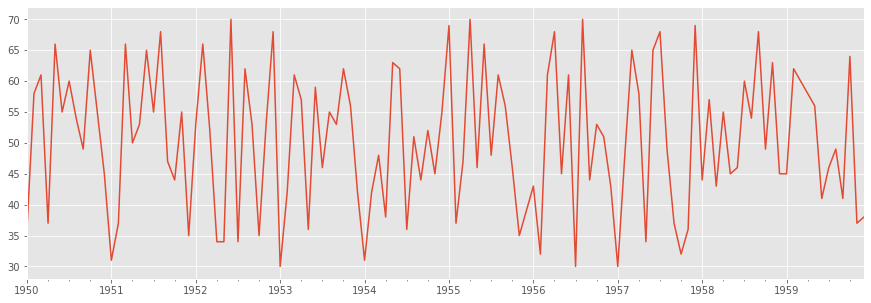

In [11]:
df['a'].plot(figsize = (15,5))
plt.show()

 - **stationary data or constant data doesn't have any trend and seasonality**

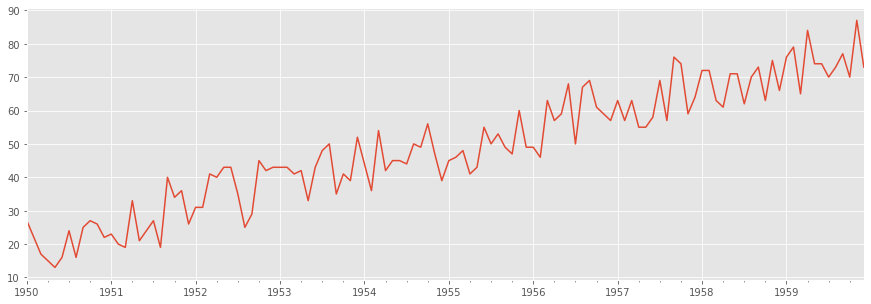

In [12]:
df['b'].plot(figsize = (15,5))
plt.show()

 - **for non stationary data have trend and seasonality**

### How to convert non stationanry data into stationary data
- by diffrenciating we can get that conversion

In [13]:
from statsmodels.tsa.statespace.tools import diff

In [14]:
diff(df['b'], k_diff= 1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

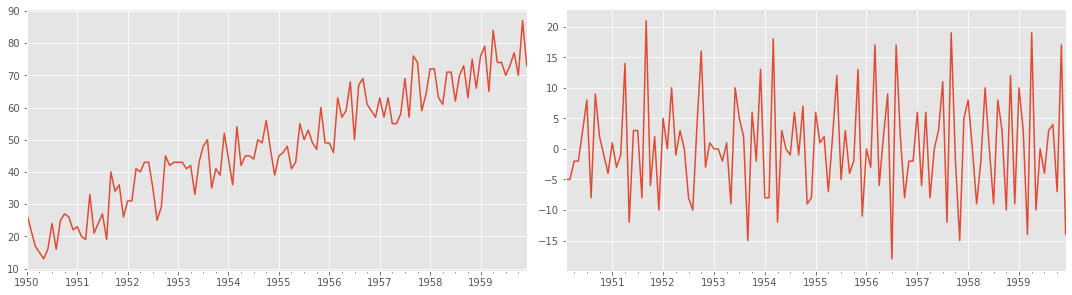

In [22]:
# original plot and diffrenced plot
plt.figure(figsize= (15,8))
plt.subplot(2,2,1)
df['b'].plot()

plt.subplot(2,2,2)
diff(df['b'], k_diff= 1).plot()
plt.tight_layout()
plt.show()

### ACF and PACF
 - Auto Correlation and Partial Auto Correlation Factors
 - **Correlation** : it is a measure of the strength of the linear relation between two variables
 - if **correlation** is closer to **+1** then **postive correlation**
 - if **correlation** is closer to **-1** then **negative correlation**
 - if **correlation** is closer to  **0** then **zero correlation**
### Auto Correlation
 - correlation with the time series itself lag by x units is called **auto correlation** 
 - Y-axis : **auto correlation**, X-axis : **how many units lag**
 
### If we do this for all possible time shifts / lags that shows this plot (ACF | PACF)
- common behaviors of plots
 - gradual decline
 - sharp drop-offs
 
### ACF : will describe direct and indirect dependency of observation and its lag
### PACF : will describe direct dependency of observation and its lag

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [25]:
# NON-stationary data
df1 = pd.read_csv('data/airline_passengers.csv', index_col= 'Month', parse_dates= True)
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
df.index.freq = 'MS'

In [29]:
df.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

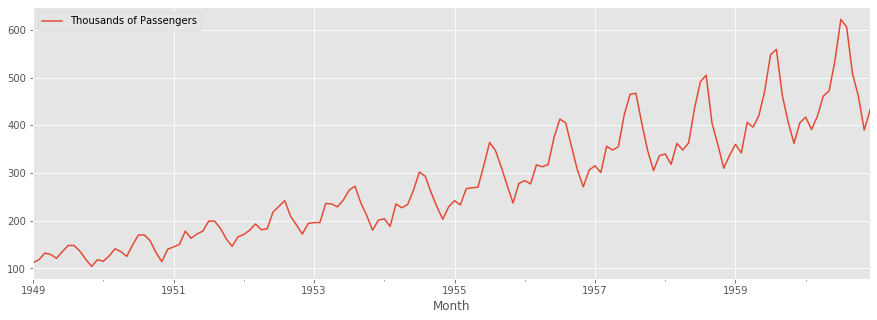

In [28]:
df1.plot(figsize = (15,5))
plt.show()

In [30]:
# Stationary data
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv', index_col= 'Date', parse_dates= True)
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [35]:
df2.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [31]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [33]:
df2.index.freq = 'D' # D for daily data

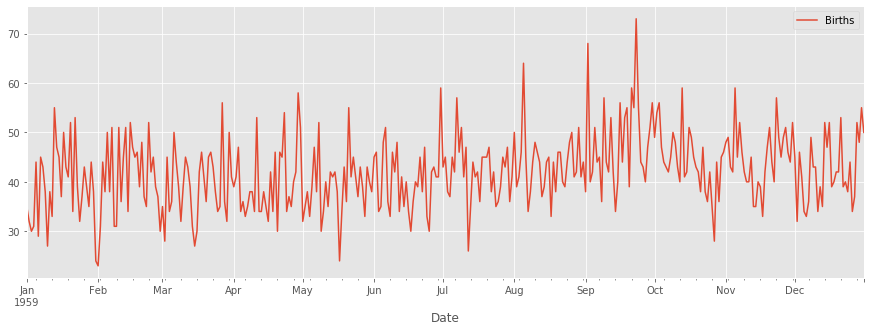

In [34]:
df2.plot(figsize = (15,5))
plt.show()

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.DataFrame({'a':[10,15,20,25,30]})
df

,a
0,10
1,15
2,20
3,25
4,30


In [39]:
acf(df)

array([ 1. ,  0.4, -0.1, -0.4, -0.4])

In [41]:
pacf_yw(df, nlags= 4, method= 'unbiased') # method = mle = max linklihood, nlags = n-1 samples

array([ 1.        ,  0.5       , -0.55555556, -1.14285714,  7.75      ])

In [42]:
pacf_ols(df, nlags= 4)

array([ 1.        ,  1.        , -0.88888889, -0.64705882,  0.22205774])

In [43]:
from pandas.plotting import lag_plot

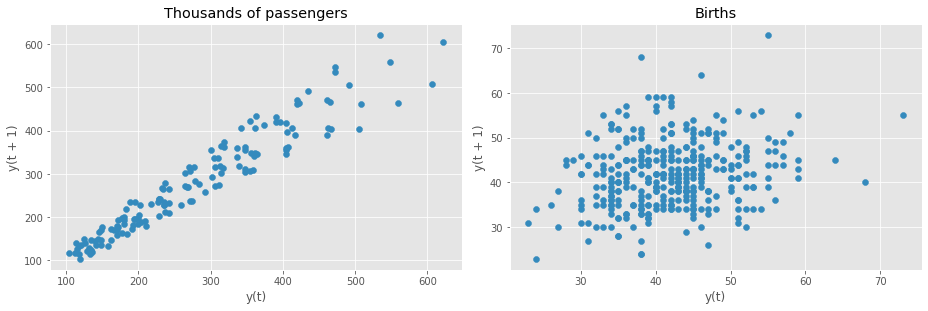

In [61]:
plt.figure(figsize= (13,8))

plt.subplot(2,2,1)
lag_plot(df1['Thousands of Passengers'])
plt.title('Thousands of passengers')

plt.subplot(2,2,2)
lag_plot(df2['Births'])
plt.title('Births')

plt.tight_layout()
plt.show()

 - Its clear from the plot that we have **auto correlation for "Thousands of passengers"** and **no auto correlation for "Births"**

### acf and pacf

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [64]:
# for non stationary data
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


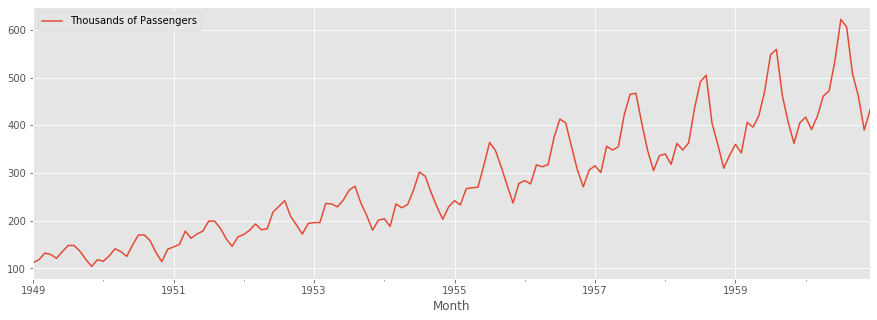

In [65]:
df1.plot(figsize = (15,5))
plt.show()

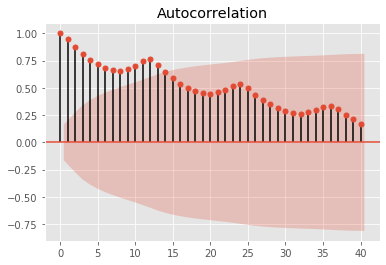

In [72]:
plot_acf(df1['Thousands of Passengers'], lags= 40);

In [73]:
# stationary data
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


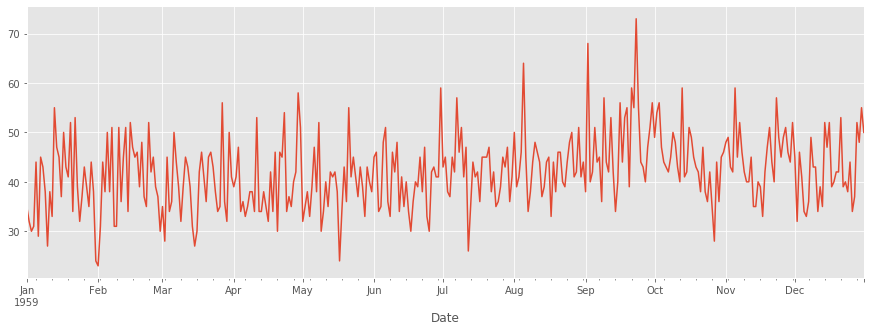

In [83]:
df2['Births'].plot(figsize = (15,5))
plt.show()


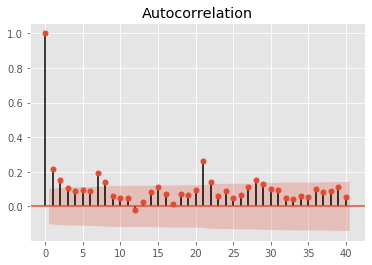

In [85]:
plot_acf(df2, lags=40);

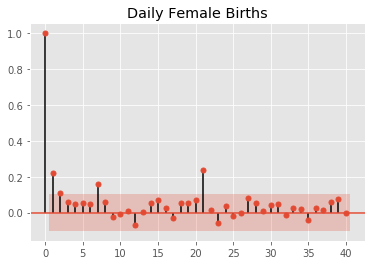

In [87]:
plot_pacf(df2, lags= 40, title= 'Daily Female Births');